# Presentation et Exploitation  des Données 

Dans ce chapitre nous allons exploités les données mise en notre disposition par les autorités de l'ULPGL.
Celles-ci sont issues du système d'information UAT (Univeristy Administrative Tool) et pour des raisons de confidentialité nous n'avons pas eu accès a toute la base des données nous avons juste fais une requete des donnes dont nous avons besoin pour notre étude et l'administrateur a executé une requete vers sa base des données et nous a fourni les données dont nous avions besoin pour l'etude sous forme d'un fichier csv (commat separted values).
Comme souligné dans le chapitre premier ce chapitre se basera sur la methodologie CRISP-DM elle sera subdivisé en differentes sections:
- L'exploration et la preparation des donnéés
- selection des algorithmes et leur execution 
- l'amelioratrion et optimisation des algorithmes
source : Sklean Handbook Appendix 2

## Exploration et la preparation des donness données 



source : https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
         SUNIL RAY , JANUARY 10, 2016

les specialites affirment que 70-80 % du temps consacré à un projet dataMining est alloué à la phase de l'exploration et la preparation des données , il n' ya pas des racourcis pour cette phase et si on l'a pas bien effectué nous risquons de nous retouver entrain d'ameliorer l'exactitude de notre algorithme mais en vain nous serons toujours obligées de retourner à cette phase et toutes ces techniques de l'exploration des données pourrons nous venir en aide .


1. Les Etapes de la phase d'exploration ét la preparation des donnes
Certaines des ces étapes sont mentionées sur la figure suivante ;
![alt text](Exploration.png "Exploration")
source: http://www.saedsayad.com/data_mining_map.htm

En bref l'exploration des données consiste à se plonger dans le passée pour prédire l'avenir .Souvenenons nous que la qualité de notre entré determine la qualité de notre sortie, ces phases  nous permettent  d'ameliorer la qualité de notre entré en vue d'avoir une bonne sortie.
Voici les étapes de cette phases:

- Identification des variables
- Analyse univarié
- Analyse Bi-varié
- Traitement des valeur maquantes 
- Traitement des deviations ou outliers 
- Transformation des variables
- creation des nouvelles variables

Comme nous l'avons soulignées dans le chapitre 1 ce processus est un processus iteratif et incremetale nous executerons cette phase 2 a 5 fois ou plus en vue d'avoir un bon modele

Comme soulignées dans la phase d'introduction les données mise à notre disposition sont sous format csv et nous alons utilisé la librarie pandas de python pour faire l'analyse , nous utiliserons aussi d'autres libraies qui nous permetrons de faire les statistiques ainsi ques les visualisations :

voici le code pour charger le librairies.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for beatiful visualisations
%matplotlib inline 
import scipy.stats as scs #for statistics
import operator
from scipy.stats import chi2_contingency
import scipy.stats as scs #for statistics
import matplotlib.ticker as ticker
import datetime
import dateutil

In [42]:
dataset=pd.read_csv("mashineLearningExport.csv")

Nous venons de charger les donnes et nous pouvons remarquer à quoi ils ressemblent

In [3]:
dataset.head(10)

,IDENTIFICATION,BIRTHDAY,NAME,DIPLOMDATE,DIPLOMTYPE,DIPLOMMENTION,DIPLOMPERCENTAGE,DIPLOMSECTION,DIPLOMOPTION,DIPLOMPLACE,...,SCHOOLCODE,SCHOOLSTATUS,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,OPT,PROM
0,215,1978-09-07,F,NaN,DIPLÔME D'ETAT,NaN,58.0,SCIENTIFIQUE,MATH-PHYSIQUE,NaN,...,INSTITUT VUNGI,inconnu,2012-2013,NaN,ADMIS AU MEMOIRE,63.099998,SATISFACTION,Faculté de Droit,Droit Privé et Judiciaire,L2
1,343,1973-03-04,H,1999-11-15,DIPLÔME D'ETAT,NaN,54.0,SCIENTIFIQUE,MATH PHYSIQUE,KINSHASA,...,INSTITUT FARAJA,inconnu,2015-2016,NaN,ASSIMILE AUX AJOURNES,52.200001,AJOURNE,Faculté des Sciences Économiques et de Gestion,Tronc commun,G2
2,356,1978-03-02,H,1997-12-24,DIPLÔME D'ETAT DU RWANDA,NaN,60.0,ECONOMIE ET COMMERCE,ECONOMIE,GISENYI,...,ESISE/GISENYI,inconnu,2015-2016,NaN,ADMIS AU STAGE ET AU MEMOIRE,59.900002,SATISFACTION,Faculté des Sciences Économiques et de Gestion,Gestion des Entreprises,L2
3,429,1973-01-11,H,NaN,DIPLÔME D'ETAT,NaN,0.0,TECHNIQUE,COMMERCIALE ET ADMINISTRATIVE,NaN,...,"C,S, UMOJA",inconnu,2013-2014,NaN,ASSIMILE AUX AJOURNES,NaN,AJOURNE,Faculté de Droit,Tronc commun,G1
4,645,1979-11-24,H,1999-10-09,DIPLÔME D'ETAT,NaN,53.0,LITTERAIRE,LATIN PHILO,KINSHASA,...,INST TUPENDANE/KOLWEZI,inconnu,2014-2015,NaN,ASSIMILE AUX AJOURNES,61.400002,SATISFACTION,Faculté de Droit,Droit Public,L1
5,645,1979-11-24,H,1999-10-09,DIPLÔME D'ETAT,NaN,53.0,LITTERAIRE,LATIN PHILO,KINSHASA,...,INST TUPENDANE/KOLWEZI,inconnu,2015-2016,NaN,ASSIMILE AUX AJOURNES,NaN,NON ADMISSIBLE DS LA MEME FILIERE,Faculté de Droit,Droit Public,L2
6,665,1979-11-03,H,2001-04-30,DIPLÔME D'ETAT,NaN,52.0,TECHNIQUE,SOCIALE,KINSHASA,...,INSTITUT MIKENO,inconnu,2014-2015,NaN,ASSIMILE AUX AJOURNES,NaN,AJOURNE,Faculté des Sciences Économiques et de Gestion,Gestion des Entreprises,L2
7,735,1965-09-02,H,NaN,inconnu,NaN,0.0,inconnu,inconnu,NaN,...,NaN,inconnu,2014-2015,NaN,ASSIMILE AUX AJOURNES,65.099998,SATISFACTION,Faculté de Santé et Développement Communautaires,Santé et Développement Communautaires,L2
8,736,1961-07-07,H,NaN,inconnu,NaN,0.0,inconnu,inconnu,NaN,...,NaN,inconnu,2014-2015,NaN,ASSIMILE AUX AJOURNES,60.799999,SATISFACTION,Faculté de Santé et Développement Communautaires,Santé et Développement Communautaires,L2
9,827,1962-04-15,H,NaN,inconnu,NaN,60.0,TEC,CA,NaN,...,AUTO,inconnu,2014-2015,NaN,ASSIMILE AUX AJOURNES,NaN,AJOURNE,Faculté des Sciences Économiques et de Gestion,Gestion Financière,L2


In [5]:
dataset.shape

(7216, 22)

Nous remarquons que les données sont stocké dans un e structure de type matricielle appelé dataframe.
source : https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe

un DataFrame  selon la documentation officielle de pandas  est une structure des données bidementionnel avec des colonnes des données des differentes types . Il peut etre compareé à une feuille de calcul excel ou une table dans SQL

la commande dataset.shape nous a permis de dire que notre emsemble d'apprentissage de  depart
comprend 7216 lignes et 22 colones !
Analysons de plus pret les colones 

In [6]:
dataset.columns

Index([u'IDENTIFICATION', u'BIRTHDAY', u'NAME', u'DIPLOMDATE', u'DIPLOMTYPE',
       u'DIPLOMMENTION', u'DIPLOMPERCENTAGE', u'DIPLOMSECTION',
       u'DIPLOMOPTION', u'DIPLOMPLACE', u'SCHOOL', u'SCHOOLPROVINCE',
       u'SCHOOLCODE', u'SCHOOLSTATUS', u'ACADYEAR', u'PERC1', u'MENT1',
       u'PERC2', u'MENT2', u'FAC', u'OPT', u'PROM'],
      dtype='object')

chaque ligne comprend les information d'un étudiant pour une année Academeique

1 IDENTIFICATION : contient une identification unique et anonyme d'un étudiant  les noms et les matricules reeles des étudiants on éé cachées pour des raisons de confidentialites 

2 BIRTHDAY : contient la date de naissance de chaque étudiant

3 NAME : contient le sexe de chaque étudiant

4 DIPLOMDATE : L'anné d'optiention du diplome

5 DIPLOMTYPE : le type de diplome

6 DIPLOMMENTION : mention de diplome

7 DIPLOMPERCENTAGE: le pourcentage du diplome

8 DIPLOMSECTION: la section du diplome

9 DIPLOMOPTION : l'option

10 DIPLOMPLACE : l'endroit d'optention du diplome

11 SCHOOL : l'ecole de provenance

12 SCHOOLPROVINCE : la province de provenance

13 SCHOOLCODE : code de l'ecole

14 SCHOOLSTATUS : le status de l'ecole (privaté , publique , conventioneé ,..)

15 ACADYEAR  : l'annéé academique '

16 PERC1 : poucentage en premiere session

17 MENT1 : mention en premier session

18 PERC2 : pourcentage en seconde session

19 MENT2 : mention en seconde session

20 FAC : la faculté

21 OPT : l'option

22 PROM : la promotion

Comme nous pouvons le constater les colonnes 1-14 regrogent les informations que chaque étudiant donné à son instcription , ils constituerons nos variables d'entres
les restes seronts utilisées pour constituer notre variable de sortie

Nous l'avons aussi signales que chaque ligne comprend les information d'un étudiant pour une année academique .
Pour mener bien notre anyse nous alons grouper les information de chaque etudieant en une lignee 

In [5]:
inputCol=dataset.columns[0:14]

nos données seront groupé selons les variables d'entrees ensuites les donnés de sorties serot groupes selon une fonction d'aggregation predefinie 

Nous allons premierement faire une analyse univarié sur les données en entrees !

Avant la phase de traitement des donnés regardons notre ensemble pour enlever les colonnes sans informations consoiderables.

Nous avons ecrit une function qui nous donnes un pourcentrage des valeurs maquantes pour chaque collones et de prime à bord nous allons supprimer certaines colonnes qu
ne comportent pas des informations.


In [4]:
def percentageMissin(Dataset):
    """this function will return the percentage of missing values in a dataset """
    if isinstance(Dataset,pd.DataFrame):
        adict={} #a dictionary conatin keys columns names and values percentage of missin value in the columns
        for col in Dataset.columns:
            adict[col]=(np.count_nonzero(Dataset[col].isnull())*100)/len(Dataset[col])
        return pd.DataFrame(adict,index=['% of missing'],columns=adict.keys())
    else:
        raise TypeError("can only be used with panda dataframe")

In [5]:
MissinValueTables=percentageMissin(dataset)

In [6]:
MissinValueTables.loc['% of missing']

BIRTHDAY             0
DIPLOMDATE          98
DIPLOMPLACE         98
SCHOOLSTATUS         0
DIPLOMPERCENTAGE     0
SCHOOLPROVINCE       0
FAC                  0
ACADYEAR             0
DIPLOMMENTION       99
SCHOOLCODE          71
PERC1               73
PERC2               15
DIPLOMOPTION         0
OPT                  0
SCHOOL               6
NAME                 0
DIPLOMSECTION        0
MENT1                0
PROM                 0
MENT2                0
IDENTIFICATION       0
DIPLOMTYPE           0
Name: % of missing, dtype: int64

In [9]:
MissinValueTables

,BIRTHDAY,DIPLOMDATE,DIPLOMPLACE,SCHOOLSTATUS,DIPLOMPERCENTAGE,SCHOOLPROVINCE,FAC,ACADYEAR,DIPLOMMENTION,SCHOOLCODE,...,DIPLOMOPTION,OPT,SCHOOL,NAME,DIPLOMSECTION,MENT1,PROM,MENT2,IDENTIFICATION,DIPLOMTYPE
% of missing,0,98,98,0,0,0,0,0,99,71,...,0,0,6,0,0,0,0,0,0,0


Avec cette table nous remarquons que 4 colones ne nous servirons à riens dans la suite car elles disposent de plus de 70 % des valeurs maquantes et nous devons les suprimées avant de continuer notre analyse 

In [7]:
ColWIthoutInfo=['DIPLOMDATE','DIPLOMMENTION','DIPLOMPLACE','SCHOOLCODE']
dataset.drop(labels=ColWIthoutInfo,axis=1,inplace=True)

In [8]:
dataset.head()

,IDENTIFICATION,BIRTHDAY,NAME,DIPLOMTYPE,DIPLOMPERCENTAGE,DIPLOMSECTION,DIPLOMOPTION,SCHOOL,SCHOOLPROVINCE,SCHOOLSTATUS,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,OPT,PROM
0,215,1978-09-07,F,DIPLÔME D'ETAT,58.0,SCIENTIFIQUE,MATH-PHYSIQUE,INSTITUT VUNGI,NORD-KIVU,inconnu,2012-2013,NaN,ADMIS AU MEMOIRE,63.099998,SATISFACTION,Faculté de Droit,Droit Privé et Judiciaire,L2
1,343,1973-03-04,H,DIPLÔME D'ETAT,54.0,SCIENTIFIQUE,MATH PHYSIQUE,INSTITUT FARAJA,NORD-KIVU,inconnu,2015-2016,NaN,ASSIMILE AUX AJOURNES,52.200001,AJOURNE,Faculté des Sciences Économiques et de Gestion,Tronc commun,G2
2,356,1978-03-02,H,DIPLÔME D'ETAT DU RWANDA,60.0,ECONOMIE ET COMMERCE,ECONOMIE,ESISE/GISENYI,inconnu,inconnu,2015-2016,NaN,ADMIS AU STAGE ET AU MEMOIRE,59.900002,SATISFACTION,Faculté des Sciences Économiques et de Gestion,Gestion des Entreprises,L2
3,429,1973-01-11,H,DIPLÔME D'ETAT,0.0,TECHNIQUE,COMMERCIALE ET ADMINISTRATIVE,"C,S, UMOJA",NORD-KIVU,inconnu,2013-2014,NaN,ASSIMILE AUX AJOURNES,NaN,AJOURNE,Faculté de Droit,Tronc commun,G1
4,645,1979-11-24,H,DIPLÔME D'ETAT,53.0,LITTERAIRE,LATIN PHILO,INST TUPENDANE/KOLWEZI,KATANGA,inconnu,2014-2015,NaN,ASSIMILE AUX AJOURNES,61.400002,SATISFACTION,Faculté de Droit,Droit Public,L1


Nous pouvons remarquer que notre ensemble d'apprentissage change de dimension et (7216,22) à (7216,18)

In [12]:
dataset.shape

(7216, 18)

In [13]:
dataset.columns

Index([u'IDENTIFICATION', u'BIRTHDAY', u'NAME', u'DIPLOMTYPE',
       u'DIPLOMPERCENTAGE', u'DIPLOMSECTION', u'DIPLOMOPTION', u'SCHOOL',
       u'SCHOOLPROVINCE', u'SCHOOLSTATUS', u'ACADYEAR', u'PERC1', u'MENT1',
       u'PERC2', u'MENT2', u'FAC', u'OPT', u'PROM'],
      dtype='object')

les colonnes en entrée deviennent les 10 premiers colonnes 

In [9]:
inCol=list(dataset.columns[0:10])

In [10]:
outCol=list(dataset.columns[10:])

Pour une premiere approche nous allons grouper notre ensemble en fonction des données en entré et ensuite  ecrire une functuion qui va groupper les donnes de sortie

In [16]:
dataset.groupby(inCol)

voici la function qui va groupper les données de sortie

In [11]:
def f(x):
    return pd.Series(dict(
     ACADYEAR=list(x['ACADYEAR']),
     MENT1=list(x['MENT1']),
     MENT2=list(x['MENT2']),
     PERC1=list(x['PERC1']),
     PERC2=list(x['PERC2']),
     FAC=reduce(lambda x:x, [x['FAC'].iloc[0]]),
     OPT=reduce(lambda x:x, [x['OPT'].iloc[0]]),
     PROM=list(x['PROM'])
    ))

In [12]:
datasetV1=dataset.groupby(inCol).apply(f)

In [19]:
datasetV1.head(5)

,,,,,,,,,,ACADYEAR,FAC,MENT1,MENT2,OPT,PERC1,PERC2,PROM
IDENTIFICATION,BIRTHDAY,NAME,DIPLOMTYPE,DIPLOMPERCENTAGE,DIPLOMSECTION,DIPLOMOPTION,SCHOOL,SCHOOLPROVINCE,SCHOOLSTATUS,,,,,,,,
215,1978-09-07,F,DIPLÔME D'ETAT,58.0,SCIENTIFIQUE,MATH-PHYSIQUE,INSTITUT VUNGI,NORD-KIVU,inconnu,[2012-2013],Faculté de Droit,[ADMIS AU MEMOIRE],[SATISFACTION],Droit Privé et Judiciaire,[nan],[63.0999984741],[L2]
343,1973-03-04,H,DIPLÔME D'ETAT,54.0,SCIENTIFIQUE,MATH PHYSIQUE,INSTITUT FARAJA,NORD-KIVU,inconnu,[2015-2016],Faculté des Sciences Économiques et de Gestion,[ASSIMILE AUX AJOURNES],[AJOURNE],Tronc commun,[nan],[52.2000007629],[G2]
356,1978-03-02,H,DIPLÔME D'ETAT DU RWANDA,60.0,ECONOMIE ET COMMERCE,ECONOMIE,ESISE/GISENYI,inconnu,inconnu,[2015-2016],Faculté des Sciences Économiques et de Gestion,[ADMIS AU STAGE ET AU MEMOIRE],[SATISFACTION],Gestion des Entreprises,[nan],[59.9000015259],[L2]
429,1973-01-11,H,DIPLÔME D'ETAT,0.0,TECHNIQUE,COMMERCIALE ET ADMINISTRATIVE,"C,S, UMOJA",NORD-KIVU,inconnu,[2013-2014],Faculté de Droit,[ASSIMILE AUX AJOURNES],[AJOURNE],Tronc commun,[nan],[nan],[G1]
645,1979-11-24,H,DIPLÔME D'ETAT,53.0,LITTERAIRE,LATIN PHILO,INST TUPENDANE/KOLWEZI,KATANGA,inconnu,"[2014-2015, 2015-2016]",Faculté de Droit,"[ASSIMILE AUX AJOURNES, ASSIMILE AUX AJOURNES]","[SATISFACTION, NON ADMISSIBLE DS LA MEME FILIERE]",Droit Public,"[nan, nan]","[61.4000015259, nan]","[L1, L2]"


In [13]:
datasetV1.reset_index(inplace=True)

In [62]:
datasetV1

,IDENTIFICATION,BIRTHDAY,NAME,DIPLOMTYPE,DIPLOMPERCENTAGE,DIPLOMSECTION,DIPLOMOPTION,SCHOOL,SCHOOLPROVINCE,SCHOOLSTATUS,ACADYEAR,FAC,MENT1,MENT2,OPT,PERC1,PERC2,PROM
0,215,1978-09-07,F,DIPLÔME D'ETAT,58.0,SCIENTIFIQUE,MATH-PHYSIQUE,INSTITUT VUNGI,NORD-KIVU,inconnu,[2012-2013],Faculté de Droit,[ADMIS AU MEMOIRE],[SATISFACTION],Droit Privé et Judiciaire,[nan],[63.0999984741],[L2]
1,343,1973-03-04,H,DIPLÔME D'ETAT,54.0,SCIENTIFIQUE,MATH PHYSIQUE,INSTITUT FARAJA,NORD-KIVU,inconnu,[2015-2016],Faculté des Sciences Économiques et de Gestion,[ASSIMILE AUX AJOURNES],[AJOURNE],Tronc commun,[nan],[52.2000007629],[G2]
2,356,1978-03-02,H,DIPLÔME D'ETAT DU RWANDA,60.0,ECONOMIE ET COMMERCE,ECONOMIE,ESISE/GISENYI,inconnu,inconnu,[2015-2016],Faculté des Sciences Économiques et de Gestion,[ADMIS AU STAGE ET AU MEMOIRE],[SATISFACTION],Gestion des Entreprises,[nan],[59.9000015259],[L2]
3,429,1973-01-11,H,DIPLÔME D'ETAT,0.0,TECHNIQUE,COMMERCIALE ET ADMINISTRATIVE,"C,S, UMOJA",NORD-KIVU,inconnu,[2013-2014],Faculté de Droit,[ASSIMILE AUX AJOURNES],[AJOURNE],Tronc commun,[nan],[nan],[G1]
4,645,1979-11-24,H,DIPLÔME D'ETAT,53.0,LITTERAIRE,LATIN PHILO,INST TUPENDANE/KOLWEZI,KATANGA,inconnu,"[2014-2015, 2015-2016]",Faculté de Droit,"[ASSIMILE AUX AJOURNES, ASSIMILE AUX AJOURNES]","[SATISFACTION, NON ADMISSIBLE DS LA MEME FILIERE]",Droit Public,"[nan, nan]","[61.4000015259, nan]","[L1, L2]"
5,665,1979-11-03,H,DIPLÔME D'ETAT,52.0,TECHNIQUE,SOCIALE,INSTITUT MIKENO,NORD-KIVU,inconnu,[2014-2015],Faculté des Sciences Économiques et de Gestion,[ASSIMILE AUX AJOURNES],[AJOURNE],Gestion des Entreprises,[nan],[nan],[L2]
6,827,1962-04-15,H,inconnu,60.0,TEC,CA,AUTO,NORD-KIVU,inconnu,[2014-2015],Faculté des Sciences Économiques et de Gestion,[ASSIMILE AUX AJOURNES],[AJOURNE],Gestion Financière,[nan],[nan],[L2]
7,1061,1979-02-18,H,DIPLÔME D'ETAT,51.0,PEDAGOGIEQUE,PEDA GENERALE,INSTITUT MONT GOMA,NORD-KIVU,inconnu,"[2013-2014, 2014-2015]",Faculté des Sciences Économiques et de Gestion,"[ASSIMILE AUX AJOURNES, ASSIMILE AUX AJOURNES]","[SATISFACTION, SATISFACTION]",Gestion Financière,"[nan, nan]","[56.0, 62.5999984741]","[L1, L2]"
8,1289,1967-12-02,F,inconnu,52.0,PED,PG,BUTURANDE,NORD-KIVU,inconnu,"[2013-2014, 2014-2015]",Faculté de Psychologie et des Sciences de l'Éd...,"[AJOURNE, ADMIS AU MEMOIRE]","[SATISFACTION, SATISFACTION]",Sciences de l'Éducation,"[58.7000007629, nan]","[63.0, 68.3000030518]","[L1, L2]"
9,1376,1979-06-24,H,DIPLÔME D'ETAT,51.0,PEDAGOGIEQUE,PEDA GENERALE,INST AMKENI,NORD-KIVU,inconnu,[2013-2014],Faculté de Théologie,[ADMIS AU MEMOIRE],[SATISFACTION],Tronc commun,[61.0999984741],[61.0999984741],[L2]


apres groupement en fonction des matricules nous venons de remarquer que notre ensemble comprend 4038 rows et  18 columns et c'est sera notre ensemble pour notre étude 

cette ensemble est subdivisé en variables d'entré et variables de sortie!

In [14]:
datasetIn=pd.DataFrame(datasetV1[inCol])

In [15]:
datasetOut=pd.DataFrame(datasetV1[['IDENTIFICATION']+outCol])

In [164]:
datasetOut.head(10)

,IDENTIFICATION,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,OPT,PROM
0,215,[2012-2013],[nan],[ADMIS AU MEMOIRE],[63.0999984741],[SATISFACTION],Faculté de Droit,Droit Privé et Judiciaire,[L2]
1,343,[2015-2016],[nan],[ASSIMILE AUX AJOURNES],[52.2000007629],[AJOURNE],Faculté des Sciences Économiques et de Gestion,Tronc commun,[G2]
2,356,[2015-2016],[nan],[ADMIS AU STAGE ET AU MEMOIRE],[59.9000015259],[SATISFACTION],Faculté des Sciences Économiques et de Gestion,Gestion des Entreprises,[L2]
3,429,[2013-2014],[nan],[ASSIMILE AUX AJOURNES],[nan],[AJOURNE],Faculté de Droit,Tronc commun,[G1]
4,645,"[2014-2015, 2015-2016]","[nan, nan]","[ASSIMILE AUX AJOURNES, ASSIMILE AUX AJOURNES]","[61.4000015259, nan]","[SATISFACTION, NON ADMISSIBLE DS LA MEME FILIERE]",Faculté de Droit,Droit Public,"[L1, L2]"
5,665,[2014-2015],[nan],[ASSIMILE AUX AJOURNES],[nan],[AJOURNE],Faculté des Sciences Économiques et de Gestion,Gestion des Entreprises,[L2]
6,827,[2014-2015],[nan],[ASSIMILE AUX AJOURNES],[nan],[AJOURNE],Faculté des Sciences Économiques et de Gestion,Gestion Financière,[L2]
7,1061,"[2013-2014, 2014-2015]","[nan, nan]","[ASSIMILE AUX AJOURNES, ASSIMILE AUX AJOURNES]","[56.0, 62.5999984741]","[SATISFACTION, SATISFACTION]",Faculté des Sciences Économiques et de Gestion,Gestion Financière,"[L1, L2]"
8,1289,"[2013-2014, 2014-2015]","[58.7000007629, nan]","[AJOURNE, ADMIS AU MEMOIRE]","[63.0, 68.3000030518]","[SATISFACTION, SATISFACTION]",Faculté de Psychologie et des Sciences de l'Éd...,Sciences de l'Éducation,"[L1, L2]"
9,1376,[2013-2014],[61.0999984741],[ADMIS AU MEMOIRE],[61.0999984741],[SATISFACTION],Faculté de Théologie,Tronc commun,[L2]


In [79]:
datasetOut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 9 columns):
IDENTIFICATION    4038 non-null int64
ACADYEAR          4038 non-null object
PERC1             4038 non-null object
MENT1             4038 non-null object
PERC2             4038 non-null object
MENT2             4038 non-null object
FAC               4038 non-null object
OPT               4038 non-null object
PROM              4038 non-null object
dtypes: int64(1), object(8)
memory usage: 284.0+ KB


Nous venons de finir avec la presentation des nos données nous allons maintenant debuter avec la phase d'analyse promremendite des donnés que nous avons en entré , ensuite nous fairons une analyse des données en sortie et enfin analyse les donnes des sortie combinées à celles des données en entrée.

### Analyse des données

Cette phase comprend une analyse statistique bivarié et univarié nous visualiserons les résultat à l'aide des graphiques .
Dans cette partie nous utiliserons beaucoup plus la statistique descriptives et inferentielle.

In [78]:
datasetIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 10 columns):
IDENTIFICATION      4038 non-null int64
BIRTHDAY            4038 non-null object
NAME                4038 non-null object
DIPLOMTYPE          4038 non-null object
DIPLOMPERCENTAGE    4038 non-null float64
DIPLOMSECTION       4038 non-null object
DIPLOMOPTION        4038 non-null object
SCHOOL              4038 non-null object
SCHOOLPROVINCE      4038 non-null object
SCHOOLSTATUS        4038 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 315.5+ KB


Comme nous pous pouvons le remarquer notre ensemble d'apprentissage comprend à la fois des données numeriques (continues ) ainsi que des données discrètes categories.
voici comment nous allons procèder

#### Statistique Descriptive (Analyse Univarié)

1. variable Numériques ou continues :
Pour les données continues nous allons essayer de comprendre la tendence et la dispertion des nos variables .les metriques utilisées sont sur la figure suivante:

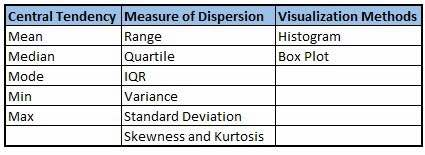
En bréf nous allons éxaminer le moyenne , le mode , l'ecart-type et la variance , nous conterons aussi les variables nous fairons les visualisations avec des boxplot!
cette étape nous sera aussi utile dans le traitement des valeur maquantes et des outliers!
2. variable categorielle ou quantitative
Pour les données discrètes nous aloons les tables des frequences pour comprendre la distrubution de chaque categorie nous pour aussi voir le pourcentage de chaque categorie , les histogrammes et bar chart seront utilisées. 


####  Statistique Descriptive : ANalyse Bivarié

Technique d'analyse statistique des données, consistant à découvrir les relations qui peuvent exister entre les variables prises deux par deux.
L'analyse bivariée utilise les mesures d'association entre deux variables à différents niveaux de mesure et les tests d'inférence pour des mesures observées sur deux groupes et sur plus de deux groupes.

Source: Becker, William. Uncertainty propagation through large nonlinear models. Diss. University of Sheffield, 2011.
de Smith, M. J. "STATSREF: Statistical Analysis Handbook-a web-based statistics." (2015).

Nous effecurons cette analyse à 3 niveau :
1. Variables Continues et categorielle ou quantitatives
Pour effectuer cette analyse nous utiliserons le test ANOVA (Analyse of variance):

 Si les deux variables sont liées, la variable quantitative aura des
moyennes significativement différentes sur chacun des groupes
définis par la variable qualitative.

 L’hypothèse H0 est du type :
Moyenne G1 = Moyenne G2 = Moyenne G3
Conditions d'application

 les populations étudiées suivent une distribution normale


 les variances des populations sont toutes égales (HOMOSCEDASTICITE)


 les échantillons   de tailles   sont prélevés aléatoirement et indépendamment dans les populations.

[formule et decision]
2. variable Categorielles et Cateorielles

Pour ces types des données nous allons effectué le test de chi carré:
Le chi carré est un test statistique conçu pour déterminer si la différence
entre deux distributions de fréquences est attribuable à l’erreur
d’échantillonnage (le hasard) ou est suffisamment grande pour être
statistiquement significative.

Ho - est, comme son nom l'indique, une hypothèse qui postule qu'il n'y a pas de différence entre les fréquences ou les proportions des deux groupes elle est considére comme hypothèse nulle.

Si la différence entre les deux distributions est réduite, l’hypothèse nulle
sera acceptée. Si la différence est grande, l’hypothèse nulle sera rejetée.
Dans ce dernier cas, on parlera d’une différence statistiquement
significative parce que l’écart entre les deux distributions est trop
important pour être expliqué par le hasard seulement : une différence
réelle existe donc.
[Inserrer la formule]

3. Variables Continues et Continues 

Pour les variables continues on utilise cherche la correlation et pour notre travail nous allons utilisée le coeficient de correlation de pearson:
Les coefficients de corrélation permettent de donner une mesure synthétique de l'intensité de la relation entre deux caractères et de son sens lorsque cette relation est monotone. Le coefficient de corrélation de Pearson permet d'analyser les relations linéaires et le coefficient de corrélation de Spearman les relations non-linéaires monotones. Il existe d'autres coefficients pour les relations non-linéaires et non-monotones.
 
Signalons que python dispose des mutiples librairies pour effectuer ces genres d'analyse.

Commencons par l'analyse des données univariés sur les variables d'entré

In [16]:
datasetIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 10 columns):
IDENTIFICATION      4038 non-null int64
BIRTHDAY            4038 non-null object
NAME                4038 non-null object
DIPLOMTYPE          4038 non-null object
DIPLOMPERCENTAGE    4038 non-null float64
DIPLOMSECTION       4038 non-null object
DIPLOMOPTION        4038 non-null object
SCHOOL              4038 non-null object
SCHOOLPROVINCE      4038 non-null object
SCHOOLSTATUS        4038 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 315.5+ KB


Nous remarquons que nous données en entré dispose des 10 colones avec variables quantitatives et qualitatives, 

###### 1. Variables continues
###### a. Attribue Date

Type: String

Pour nous faciliter la tache nous allons remplacer la date de naissance de chaque individu par son age a ce moment ci et ainsi obtenit un attribue continue de plus.

In [30]:
from datetime import date
datasetIn['BIRTHDAY'] = pd.to_datetime(datasetIn['BIRTHDAY'], format='%Y-%m-%d',errors='coerce')     #convert the time from string to date
datasetIn['BIRTHDAY']=datasetIn['BIRTHDAY'].apply(lambda x : date.today().year - x.year - ((date.today().month, date.today().day) < (x.month, x.day)))

Valeurs Maquantes : Oui , ils sont causées par des erreurs à l'entré

In [31]:
datasetIn['BIRTHDAY'].isnull().sum()

67

In [73]:
len(datasetIn)

4038

In [76]:
67/ 4038

0

Solution : Ils sont remplace par la moyenne comme leur proportion est insignifiant

In [32]:
datasetIn['BIRTHDAY']=datasetIn['BIRTHDAY'].fillna(np.mean(datasetIn['BIRTHDAY']))

In [33]:
datasetIn.describe()

,IDENTIFICATION,BIRTHDAY,DIPLOMPERCENTAGE
count,4038.000000,4038.000000,4038.000000
mean,8792.137692,26.072022,57.749876
std,2333.542658,3.957584,95.088746
min,215.000000,20.000000,0.000000
25%,7310.250000,24.000000,52.000000
50%,9181.500000,25.000000,55.000000
75%,10540.750000,27.000000,60.000000
max,12360.000000,58.000000,6053.000000


Ce tableau decrit toutes les informations possibles sur les données continues 
et de prime à bord nous sommes à mesure de constater certaines incoherences sur les diplome percentage qui on un maximun de 6053 et un minimum de 0 qui est vraiment impossible car le diplome en RDC doi etre compris entre 50 et 100 % !Nous allons visualisé ces inchoherence de plus prêt avec des boxplots.

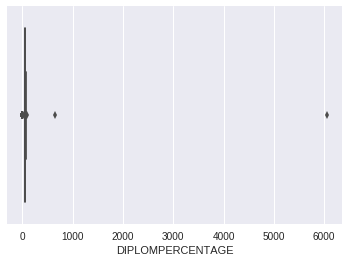

In [34]:
ax = sns.boxplot(x=datasetIn['DIPLOMPERCENTAGE'])

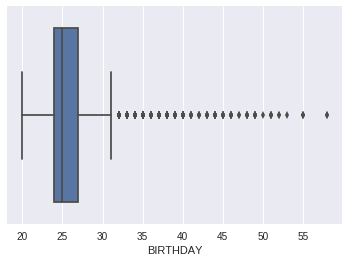

In [35]:
ax = sns.boxplot(x=datasetIn['BIRTHDAY'])

Au vu de ces courbes nous remarquons que l'attribue diplome percentage dispose de beaucoup des deviations.

Mais l'attribue Bithday a une distribution presque normale

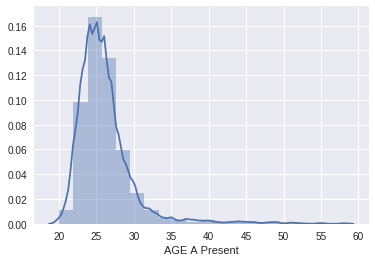

In [36]:
sns.distplot(datasetIn['BIRTHDAY'],bins=20,axlabel='AGE A Present',kde=1,norm_hist=0)

Nous pouvons facilement voir que l'age a une distribution presque normale.
NB: change norm hist to 1 to see count

regardons de plus pret celui du diplome percentage

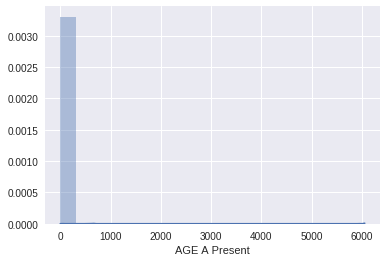

In [128]:
sns.distplot(datasetIn['DIPLOMPERCENTAGE'],bins=20,axlabel='AGE A Present',kde=1,norm_hist=0)

A cause des dispertions nous ne pouvons pas bien visualis la distribution.
essayons d'isoler les distibution pour voir de plus prét les données . 

In [132]:
len(datasetIn[~datasetIn.DIPLOMPERCENTAGE.isin(range(50,100) )])

29

Nous remarquons que nous avons 29 échantillons avec des valeur hors normes nous allons les normaliser dans la phase de préparation

##### Variables qualitatives ou categorieles

Pour chaque attriblue nous alons faire de count plot voir les diffrerents valeurs

In [77]:
colCat=list(datasetIn.select_dtypes(exclude=[np.number]).columns)

In [78]:
colCat

['NAME',
 'DIPLOMTYPE',
 'DIPLOMSECTION',
 'DIPLOMOPTION',
 'SCHOOL',
 'SCHOOLPROVINCE',
 'SCHOOLSTATUS']

In [37]:
datasetIn['NAME'].value_counts()

H    2402
F    1636
Name: NAME, dtype: int64

Nous pouvons remarqué facilement avec cete comande la repartition des sexes!

In [140]:
def plotCate(X,dataset,**kwargs):
    if isinstance(dataset,pd.DataFrame) and isinstance(X,str) and X in dataset.columns :
        plt.figure(figsize= kwargs.get('size'))
        ax=sns.countplot(x=X, data=datasetIn,orient=kwargs.get('orient'))
        plt.title('Distribution de '+ X )
        plt.xlabel(X)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        # Make twin axis
        #ax2=ax.twinx()
        # Switch so count axis is on right, frequency on left
        #ax2.yaxis.tick_left()
        #ax.yaxis.tick_right()
        #ax.yaxis.set_label_position('right')
        #ax2.yaxis.set_label_position('left')
        
        #ax2.set_ylabel('Poucentage [%]')
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.3f} % soit : {:.3f}'.format(100.*y/len(dataset),y), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
        # Use a LinearLocator to ensure the correct number of ticks
        #ax.yaxis.set_major_locator(ticker.LinearLocator(11))

        # Fix the frequency range to 0-100
        #ax2.set_ylim(0,100)
        ax.set_ylim(0,len(dataset))

        # And use a MultipleLocator to ensure a tick spacing of 10
        #ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

        # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
        #ax2.grid(None)
        plt.savefig(X+'.png',dpi=100)
    else:
        raise TypeError('need only dataframe')

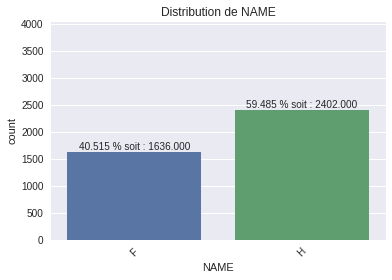

In [141]:
plotCate('NAME',datasetIn,size=(6,4))

Voici la repartition des sexes des nos echantillons pas mal..

###### Attribue : Diplome Type

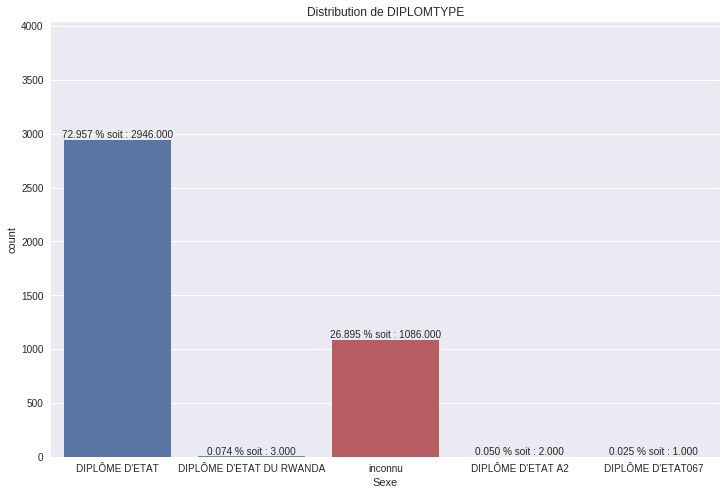

In [88]:
plotCate(colCat[1],datasetIn,size=(12,8),orient='h')

Nous pouvons remarquer que notre dataset contient plus de 70% d'element avec le diplome d'etat
et 26 avec un diplome type inconue nous allons traaiter cela à la suite et quelque echantillon avec des
diplomes du Rwanda et d'autre avec des anciens diplomes

###### Attribue Diplome option et Diplome Section

In [104]:
len(datasetIn[colCat[2]].value_counts())

90

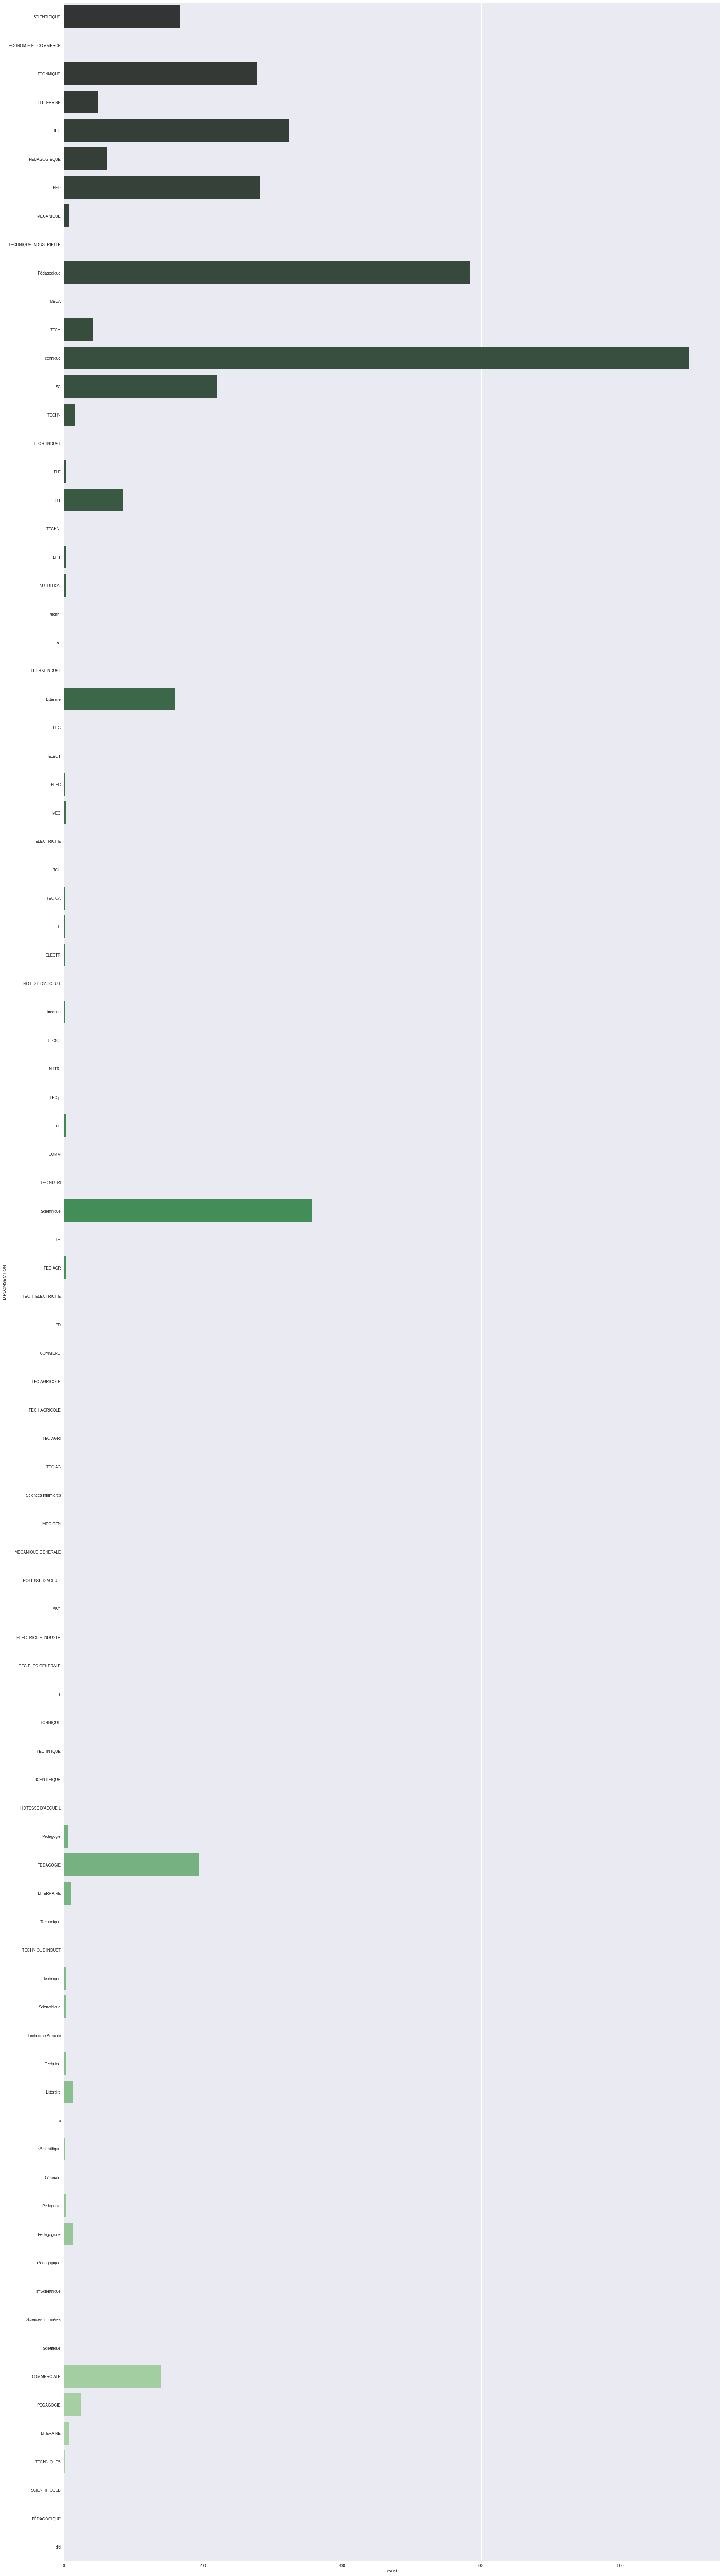

In [108]:
plt.figure(figsize=(30,120))
sns.countplot(y=colCat[2], data=datasetIn, palette="Greens_d")

Nous avons plus de 90 sections

In [110]:
datasetIn['DIPLOMOPTION'].value_counts()

Pédagogie Générale                           515
Sociale                                      342
PG                                           292
Commerciale et Administrative                271
SOCIALE                                      229
PEDAGOGIE GENERALE                           217
CA                                           210
BC                                           165
Commerciale Administrative                    98
Biologie Chimie                               92
LP                                            88
COMMERCIALE ET ADMINISTRATIVE                 78
Biologie chimie                               73
Pédagogie générale                            67
Latin Philo                                   63
BIO CHIMIE                                    59
Mathématique Physique                         58
MP                                            56
LATIN PHILO                                   55
Bio chimie                                    50
Biologie-Chimie     

une chose importante à remarquer au niveau des attribues 'DIPLOMOPTION' et 'DIPLOMSECTION' sont tres desorganisées il faut bien les oragniées dans la phase de préparation des données 

In [119]:
datasetIn.groupby(colCat[2])[colCat[3]].count()

DIPLOMSECTION
COMM                        1
COMMERC                     1
COMMERCIALE               140
ECONOMIE ET COMMERCE        1
ELE                         3
ELEC                        2
ELECT                       1
ELECTR                      2
ELECTRICITE                 1
ELECTRICITE INDUSTR         1
Générale                    1
HOTESE D'ACCEUIL            1
HOTESSE D ACEUIL            1
HOTESSE D'ACCUEIL           1
L                           1
LIT                        85
LITERAIRE                   8
LITERRAIRE                 10
LITT                        3
LITTERAIRE                 50
Litteraire                 13
Littéraire                160
MEC                         4
MEC GEN                     1
MECA                        1
MECANIQUE                   8
MECANIQUE GENERALE          1
NUTRI                       1
NUTRITION                   3
PD                          1
                         ... 
TEC NUTRI                   1
TEC µ                     

###### Attribue School Province

In [120]:
datasetIn.SCHOOLPROVINCE.value_counts()

NORD-KIVU           3145
SUD-KIVU             630
ORIENTALE             72
KINSHASA              63
MANIEMA               37
KATANGA               22
inconnu               19
BANDUNDU              12
KASAI ORIENTAL        10
N/K                    4
KASAI OCCIDENTAL       3
nk                     3
EQUATEUR               3
OUEST                  2
BAS CONGO              2
sk                     2
NORD KVU               2
NORD KVIU              2
KIGALI                 2
NYARUKENGE             1
K OR                   1
N K                    1
Name: SCHOOLPROVINCE, dtype: int64

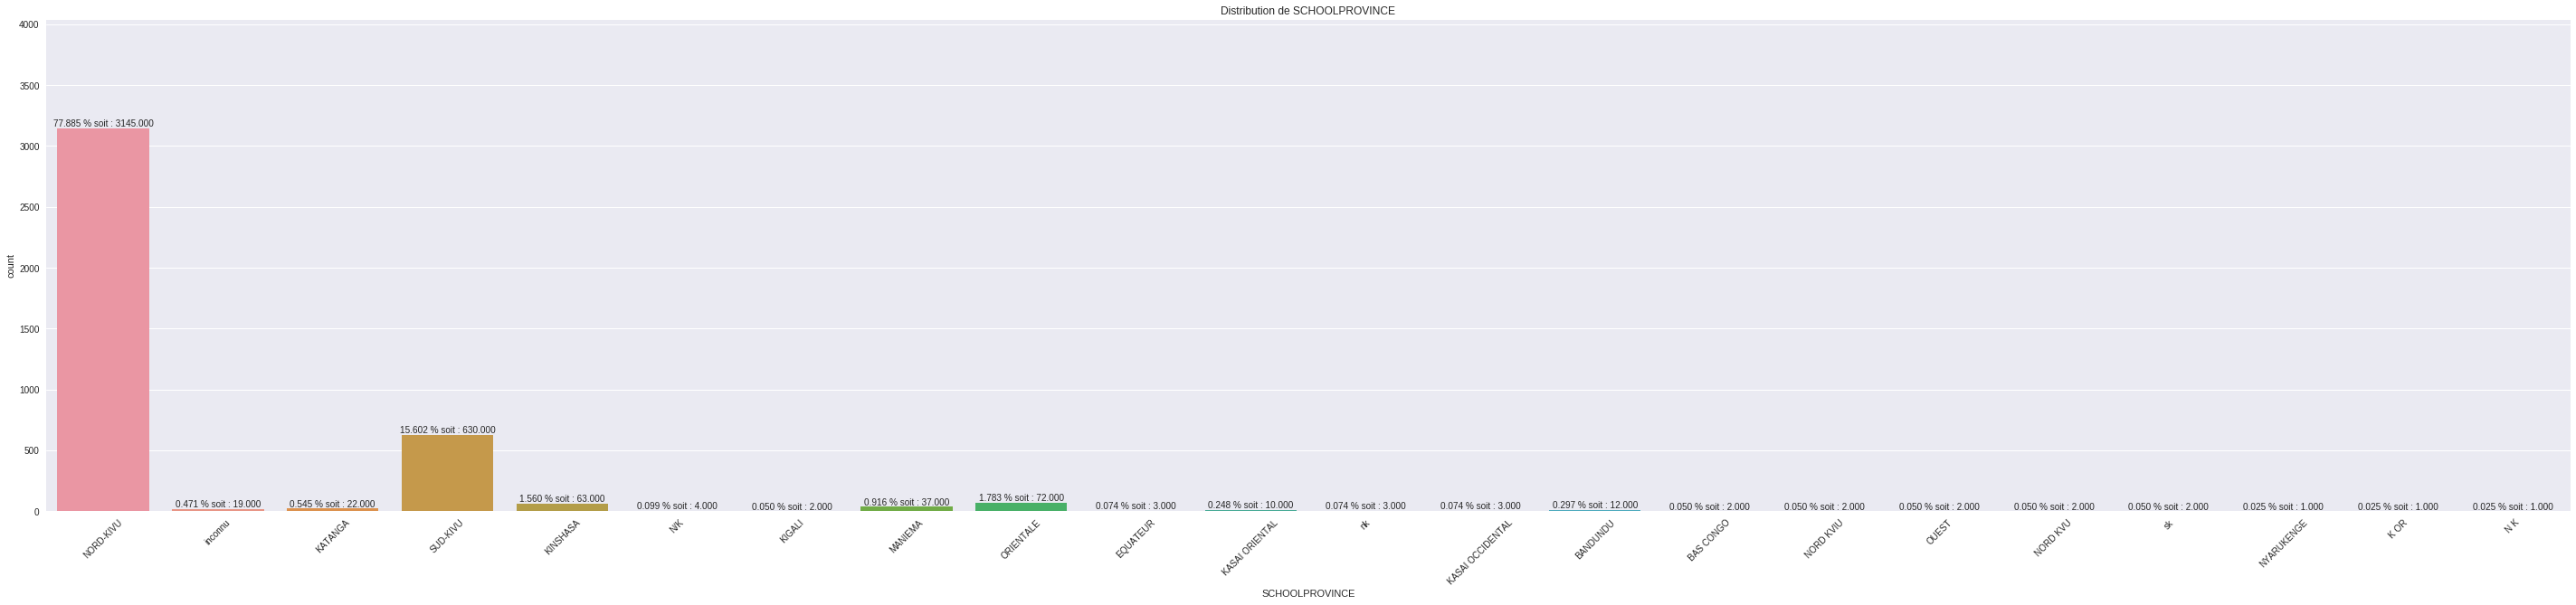

Avec cette image nous pouvons aisement constater que 63 % des étudaints de l'ulpgl proviennent de la province du nord kivu mais il ya une autre categorie qui provient du sud KIVu soit 15% 

###### Attribue SCHOOL ET SCHOOL STATUS

In [149]:
datasetIn.SCHOOL=datasetIn.SCHOOL.apply(lambda x: x.lower())

Pour une bonne visualisation on peut prealablement transformer les colones en minuscule

In [150]:
datasetIn.SCHOOL.value_counts()

metanoia                           185
mwanga                             168
maendeleo                           87
faraja                              69
majengo                             67
kyeshero                            61
isidore bakanja                     59
itig                                53
zanner                              51
himbi                               49
mont carmel                         49
maranatha                           41
institut mwanga                     38
autodidacte                         38
lycée sainte ursule                 36
institut metanoia                   35
moria                               29
mont goma                           28
uzima                               27
goma                                26
icl                                 26
mama yetu                           25
mikeno nc                           24
lycée amani                         22
bungulu                             22
saint joseph             

Nous avon un attribue avec 1285 categories differentes ...
Nous devons les analyser en details

In [151]:
datasetIn.SCHOOLSTATUS.value_counts()

inconnu         3329
protestant       210
catholique       208
privé            152
publique         129
musulman           6
kimbanguiste       3
autodidacte        1
Name: SCHOOLSTATUS, dtype: int64

In [159]:
datasetIn.loc[datasetIn.groupby('SCHOOLSTATUS').groups.get('inconnu')]['SCHOOL'].value_counts()

metanoia                           185
mwanga                             166
maendeleo                           87
faraja                              68
majengo                             67
isidore bakanja                     59
kyeshero                            59
itig                                51
zanner                              51
mont carmel                         49
himbi                               47
maranatha                           41
autodidacte                         37
lycée sainte ursule                 35
moria                               29
mont goma                           28
uzima                               27
goma                                26
mama yetu                           25
mikeno nc                           24
icl                                 24
bungulu                             22
saint joseph                        21
ibanda                              21
visoke                              20
alfajiri                 

ces attribues aussi necessite un nettoyage et une bonne reparation

In [160]:
datasetIn.loc[datasetIn.groupby('SCHOOLSTATUS').groups.get('catholique')]['SCHOOL'].value_counts()

institut mwanga                       28
lycée saint ursule                    20
institut isidore bakanja              11
institut saint marc                    8
lycée  anuarite                        6
institut mwanga/uvira                  6
iti goma                               5
institut saint michel                  5
lycée anuarite                         5
lycée amani                            4
institut uzima                         4
institut mont carmel                   4
institut kashofu                       3
institut bemba gombo                   3
institut avenir                        3
malkia wa mbingu                       2
institut mgr guido                     2
institut sebyera                       2
lycée butembo                          2
institut mgr  kataliko                 2
mwanga                                 2
institut luanga                        2
itfm bukavu                            2
institut saint joseph                  2
itig            

In [161]:
datasetIn.loc[datasetIn.groupby('SCHOOLSTATUS').groups.get('publique')]['SCHOOL'].value_counts()

institut de goma             15
institut mont goma           10
institut nyabushongo          6
institut tupendane            4
institut de butembo           3
institut bungulu              3
autodidactes                  3
institut mikeno nc            3
institut uzima                2
institut d'ibanda             2
institut moria                2
institut zawadi ya raisi      2
institut munyembelu           2
institut tuungane             2
institut uenezaji             2
institut de masisi            1
autodidacte                   1
lycée  saint ursule           1
idap isp bunia                1
institut kalangala            1
institut lumiere du monde     1
itav/mushweshwe               1
institut njanja               1
institut buhimba              1
institut mwanzo               1
institut isidore bakanja      1
institut de kisangani ii      1
institut mbula                1
lycée chem chem               1
institut de basoko            1
                             ..
institut

#### Preparation des Données 

Dans la phase précedante nous avons pu remarquer que certains variables possedent des valeurs maquantes et des valeurs extremes  nous devons resoudre ce problème pour avoir une bonne entrée
dans cette phase nous allons faire le traitement des valeurs manquantes des deviatons ,et pour les variables qualitatives nous allons grouper les donnée et bien les arrangées

Nous allons d'abord expliquer les raisons de la présence des valeur maquantes et des disperssion

et la maniere de traiter les valeurs maquantes et les dispersions

Malgré la quantité croissante de données, les problématiques de données manquantes et des valeurs extremes  restent très répandues dans
les problèmes statistiques et nécessitent une approche particulière. Ignorer les
données manquantes et les valeurs etrmes peut entraîner, outre une perte de précision, de forts biais dans les modèles d’analyse et comme signaler dans l'introduction de ce chapitre peuvent augmenter l'erreur de prédiction.

###### Cause et types des Données Manquantes 

source: https://serval.unil.ch/resource/serval:BIB_31AEEBD151B0.P001/REF

Les données manquantes (DM) ont de multiples causes. Il peut être impossible de
contacter une personne sélectionnée pour faire partie d’une enquête (non-réponse totale)
ou un répondant peut refuser de répondre à une ou plusieurs questions (non-réponse partielle).
Une mauvaise saisie de l’information peut également générer des DM. Finalement,des DM peuvent aussi être causées par l’existence de données aberrantes qui doivent être
supprimées avant d’effectuer des analyses.

selon les cause on classe les données manquantes selon differentes types 

source : [6] Little R.J.A., Rubin D.B. (1987). Statistical Analysis with Missing Data. New York :
John Wiley.

il existe plusieurs types de données manquantes, ils peuvent etre introduit lors de :
    
    1. l'extraction des données :
    il peut etre possible qu'on ait des problèmes lors de l'extraction des données 
    dasn ce cas il es preferable de verifier les données avec les donnateurs c'est comme par exemple pour notre étude dans une premiere approche nous n'avons pas reussie les données des etudiants ayant passer en premiere session 
    cetraines function peuvent aussi creer des données manquantes comme c'est le cas de notre functio qui calcule les dates '
    ces genres des données peuvent facilement etre detecter.
    2. la collecte des données ;
    c'est le cas le plus courant et il est plus facile de le detecter.
dans ce cas la classification la plus couramment utilisée ayant été proposée par Little et Rubin (1987) : 
    “Missing completely at random”(MCAR) (complètement aléatoire), 
    “Missing at random” (MAR) (aléatoire),
    “Missing not at random” (MNAR) (non aléatoire).
Les DM sont MCAR lorsque la probabilité de non réponse pour une variable ne dépend pas de celle-ci, mais uniquement de paramètres
extérieurs, indépendants de cette variable. Cela veut dire qu’il n’est pas possible de défi-
nir un profil des individus ayant des DM et que la probabilité des DM est uniforme. De
manière générale, ce type de DM est très rare. 

Les DM sont dites MAR lorsque la probabilité de non-réponse peut dépendre des observations mais pas des DM, par exemple s’il
existe une différence de non-réponse entre les hommes et les femmes concernant la question
du revenu, mais que parmi les hommes entre eux ou parmi les femmes entre-elles,
la probabilité d’avoir des non-réponses est identique quel que soit le niveau du revenu.

Finalement, les DM sont de type MNAR lorsque la probabilité de non-réponse est liée aux
valeurs prises par la variable ayant des DM.comme par exemple pour notre cas les étudiant n'ayant pas passé tous leurs examens à une session n'ont pas des pourcentage à cette session et on pour mention AA assimiléé aux ajournées .

###### Methodes d'imputations 

Nous avons choisi 9 méthodes de traitement des données manquantes largement ré-
pandues à l’heure actuelle, y compris des méthodes connues pour être peu performantes
mais cependant toujours utilisées. 
1. Analyse des cas complets (CC) : 
2. Imputation par la moyenne (MEAN) : c'est la méthode que nous utiliserons par défaut
3. Imputation par la médiane (MED) 
4. Imputation par régression simple (REG) 
5. Imputation multiple par Markov Chain Monte-Carlo (MCMC)
6. Imputation par le plus proche voisin (KNN) 
8. Imputation multiple par un algorithme basé sur le bootstrap, approchant des ré-
sultats de l’algorithme EM (EM) 
9. Imputation multiple par “Predictive Mean Matching” (PMM) 
Toutes ces techniques existe sont implementées dans  les librairies que nous utlisons 

Dans ce travail selon le cas nous allons faire une imputation par la moyenne ou par analyse des cas compltets mais soulignons qu'il faut bien reflechir avant d'utiliser une imputation par la moyenne car il a une mauvaise influance sur la variance

###### Valeurs aberantes ou extremes ou outliers

Une valeur aberrante est une valeur qui diffère de façon significative de la tendance globale
des autres observations quand on observe un ensemble de données ayant des caractéristiques
communes.
Par exemple dans l'anayse  des poucentage des diplome à l'examen d'etat nous trouvons des diplome qui ne sont pas dans l'intervalle 
0 à 50 % des étudiant avec des diplomes de 634% ou des diplomes de 0%


Voici quelque remarques à considerer pour les valeurs manquantes :
    
     1. Les valeurs aberrantes ne sont pas forcément erronées.
     Dans certains cas, la valeur aberrante doit être acceptée comme une indication intéressante.
     par exemple apres anlayse on trouve une étudaint agé de 60 ans!
     2. Il ne faut pas adopter une attitude radicale de rejet,
    ou d’inclusion systématique des valeurs aberrantes.
    Le rejet systématique peut entraîner la perte d’informations réelles
    Le rejet des valeurs aberrantes a des conséquences statistiques non négligeables
    car l’analyse est ensuite faite sur un échantillon censuré qui n’est plus aléatoire.

En fonction des circonstances, il existe des méthodes, dites robustes, qui prennent en
compte toutes les données mais minimisent l’influence des valeurs aberrantes.

L’apparition de valeurs aberrantes est due à diverses sources de natures différentes,
d’où la complexité de l’examen des valeurs aberrantes. 
    

Pour detecter les valeurs manquantes nous avons utiliser les techniques suivantes :

a) Contrôle sur le domaine des valeurs :
Exemple : Pour la variable « DIPLOMPERCENTAGE », une borne maximale (100
 % ) est connue et la valeur minimale est de 50  .
 Les valeurs supérieures à 100 et inferrieur à 50 sont considérés comme abérantes.

b) Détection graphique : Pour détecter la présence de valeurs aberrantes On a utilisé :
- Boxplot
- diagramme de dispersion des observations
classées en fonction de leur rang 

Traitement des valeurs aberrantes :

3 méthodes pour traiter les données aberrantes :
1. Les valeurs aberrantes pouvant provenir d’erreurs de saisie, on le traite séparement en étudiant cas par cas.c'est cette technique que nous allons utilisé pour certaines valeur du poucentage de diplome.

2. On les rejette et on applique ensuite une des méthodes d’imputation (moyenne,médiane…) vues pour les valeurs manquantes. 

3. On adopte des méthodes qui diminuent leur impact au cours des analyses statistiques :la médiane

passons maintenant à la préparatipn proprement dite

In [169]:
dataset.BIRTHDAY.dtype

dtype('O')

In [182]:
pd.to_datetime(datasetV1['BIRTHDAY'], format='%Y-%m-%d',errors='coerce').max()

Timestamp('1998-11-17 00:00:00')

In [9]:
import pandas as pd
import datetime,dateutil

In [3]:
datasetIn=pd.read_csv('DatasetInClean.csv')

Nous allons passer en revue toutes les attribues un à un encore pour corriger les valeur manquantes 

###### Attribut BIRTHDAY 

comme nous l'avons souligner dans la phase precedante cette colone contient les dates des nnaissances que nous avons juger bon de convertir en age .

In [25]:
BIRTHDAY1=pd.to_datetime(datasetIn['BIRTHDAY'], format='%Y-%m-%d',errors='coerce')

In [26]:
len(BIRTHDAY1.loc[BIRTHDAY1.isnull()==True])

7

In [27]:
moyenAge=int(BIRTHDAY1.loc[BIRTHDAY1.isnull()!=True].apply(birthday).mean())

In [33]:
BIRTHDAY1.fillna(datetime.datetime.now(),inplace=True)

In [53]:
BIRTHDAY1.apply(birthday).min()

0

Nous venon de voir que l'attribue date dispose de 7 valeurs manquantes que nous allons imputer par la moyenee

In [32]:
AGE.loc[33]

AttributeError: 'NoneType' object has no attribute 'loc'

In [51]:
moyenAge

24

In [52]:
datasetIn.BIRTHDAY.loc[33]

'1993-08-22'

In [55]:
AGES=BIRTHDAY1.apply(birthday)

In [59]:
AGES.min()

18

In [58]:
AGES.loc[AGES==0]=moyenAge

In [60]:
datasetIn['AGE']=AGES

In [44]:
datasetIn.drop()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 11 columns):
Unnamed: 0          4715 non-null int64
IDENTIFICATION      4715 non-null int64
SCHOOLSTATUS        4715 non-null object
SCHOOL_RIGHT        4715 non-null object
OPTION_RIGHT        4715 non-null object
FAC                 4715 non-null object
SCHOOLPROVINCE      4715 non-null object
BIRTHDAY            4715 non-null object
GENDER              4715 non-null object
DIPLOMPERCENTAGE    4715 non-null float64
AGE                 4715 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 405.3+ KB


In [7]:
def birthday(date):
    # Get the current date
    now = datetime.datetime.utcnow()
    now = now.date()
    # Get the difference between the current date and the birthday
    age = dateutil.relativedelta.relativedelta(now, date)
    age = age.years
    return age

Ensuite nous allons combiner les deux avec les données manquantes et sans les données manquantes

apres imputation des valeurs manquantes essayons de voir la repartion de l'age encore

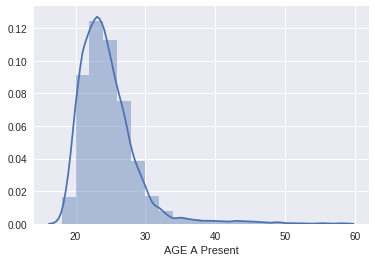

In [315]:
sns.distplot(datasetIn['BIRTHDAY'],bins=20,axlabel='AGE A Present',kde=1,norm_hist=0)

In [61]:
datasetIn['AGE'].min()

18

Et nous pouvons voir avec un box plot encore

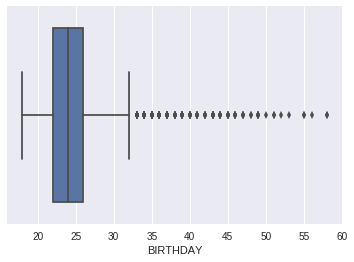

In [317]:
ax = sns.boxplot(x=datasetIn['BIRTHDAY'])

In [318]:
datasetIn.describe()

,IDENTIFICATION,BIRTHDAY,DIPLOMPERCENTAGE
count,4038.000000,4038.000000,4038.000000
mean,8792.137692,24.544329,57.749876
std,2333.542658,4.300963,95.088746
min,215.000000,18.000000,0.000000
25%,7310.250000,22.000000,52.000000
50%,9181.500000,24.000000,55.000000
75%,10540.750000,26.000000,60.000000
max,12360.000000,58.000000,6053.000000


###### Attribue Diplome Percentage

comme souligné dans la phase précedante cette variable dispose des variables aberantes 

voyons cela de pret encore :

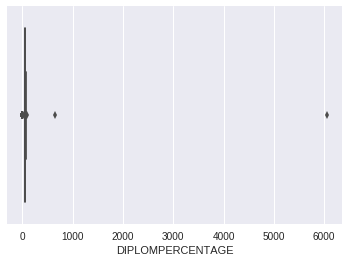

In [320]:
ax = sns.boxplot(x=datasetIn['DIPLOMPERCENTAGE'])

ce graphique montre parfaitement que la variable dispose des valeurs aberantes qui ont une tres grande influance sur la moyenne et l'ecart type'

In [322]:
datasetIn.DIPLOMPERCENTAGE.describe()

count    4038.000000
mean       57.749876
std        95.088746
min         0.000000
25%        52.000000
50%        55.000000
75%        60.000000
max      6053.000000
Name: DIPLOMPERCENTAGE, dtype: float64

un max de 6053 et un minimum de 0 c'est pratiquement impossible pour le pourcentage d'un diplome d'etat'

In [324]:
len(datasetIn.loc[~datasetIn.DIPLOMPERCENTAGE.isin(range(50,100) )])

29

nous dispons de 29 données aberantes qui riquent de biaser notre études nous avons decider de le imputer au cas par cas

jettons au cout d'oeil sur le bloxplot sans les données aberantes 

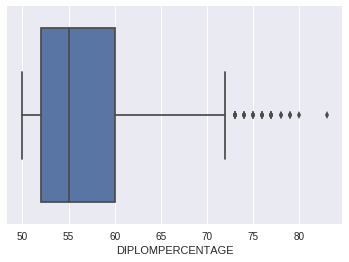

In [326]:
ax = sns.boxplot(x=datasetIn.DIPLOMPERCENTAGE.loc[datasetIn.DIPLOMPERCENTAGE.isin(range(50,100) )])

et les description statistiques 

In [77]:
datasetIn.DIPLOMPERCENTAGE.loc[datasetIn.DIPLOMPERCENTAGE<50]=MoyeneDip

In [78]:
datasetIn.describe()

,Unnamed: 0,IDENTIFICATION,DIPLOMPERCENTAGE,AGE
count,4715.00000,4715.000000,4715.000000,4715.000000
mean,2357.00000,8720.744221,56.878914,24.732768
std,1361.24759,2451.528838,5.756663,4.621602
min,0.00000,45.000000,50.000000,18.000000
25%,1178.50000,7149.000000,52.000000,22.000000
50%,2357.00000,9172.000000,56.000000,24.000000
75%,3535.50000,10579.500000,60.000000,27.000000
max,4714.00000,12360.000000,86.000000,59.000000


In [76]:
MoyeneDip=datasetIn.DIPLOMPERCENTAGE.loc[datasetIn.DIPLOMPERCENTAGE.isin(range(50,100) )].mean()

In [79]:
datasetIn.to_csv('DatasetInClean.csv')